In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# Load data
props = np.loadtxt('animals.dat', delimiter=',').reshape(32, 84)  # 32x84 matrix
names = np.loadtxt('animalnames.txt', dtype=str)  # 32 animal names

# Initialize the weight matrix with random values between 0 and 1
np.random.seed(42)  # Seed for reproducibility

In [ ]:
def compute_tau(sigma_0, sigma_T, T):
  tau = - (T**2) / (np.log(sigma_T)-np.log(sigma_0))
  return tau

In [ ]:
# Train the SOM
weights = np.random.rand(100, 84)
epochs = 20
sigma_0 = 50
sigma_T = 1
learning_rate = 0.2
tau = compute_tau(sigma_0, sigma_T, epochs-1)
for epoch in range(epochs):
    # Calculate the current neighborhood radius (linearly decreasing from 50 to 1)
    sigma_t = sigma_0 * np.exp(-epoch**2/tau)
    # print(sigma_t)
    divisor = 2 * (sigma_t**2)
    # Loop through each animal in the original order
    for animal_idx in range(len(props)):
        input_vec = props[animal_idx]
        # Compute Euclidean distances between the input vector and all weight vectors
        distances = np.linalg.norm(weights - input_vec, axis=1)
        # Find the index of the Best Matching Unit (BMU)
        bmu = np.argmin(distances)
        # Determine which nodes are within the neighborhood
        d = np.abs(np.arange(100) - bmu)
        # Neighborhood function which ajusts learning rate for every nodes
        h_t = np.exp(-d**2/divisor).reshape(-1, 1)
        # Update the weights of the BMU and its neighbors
        weights += learning_rate * h_t * (input_vec - weights)

In [ ]:
# Determine the position of each animal in the trained SOM
pos = np.zeros(32, dtype=int)
for animal_idx in range(32):
    input_vec = props[animal_idx]
    distances = np.linalg.norm(weights - input_vec, axis=1)
    pos[animal_idx] = np.argmin(distances)

# Sort the animals based on their positions
sorted_indices = np.argsort(pos)
sorted_names = names[sorted_indices]

# Print the sorted animal names
for name in sorted_names:
    print(name)

'grasshopper'
'beetle'
'dragonfly'
'butterfly'
'moskito'
'housefly'
'spider'
'pelican'
'duck'
'ostrich'
'penguin'
'frog'
'seaturtle'
'crocodile'
'walrus'
'bear'
'hyena'
'dog'
'skunk'
'ape'
'lion'
'cat'
'bat'
'rat'
'rabbit'
'elephant'
'kangaroo'
'horse'
'antelop'
'pig'
'giraffe'
'camel'


In [ ]:
cities = np.genfromtxt('cities.dat', skip_header=4, delimiter=',', dtype=str)
cities = np.array([[float(coord.strip().rstrip(';')) for coord in line] for line in cities])
num_cities = len(cities)
print(cities.shape)

(10, 2)


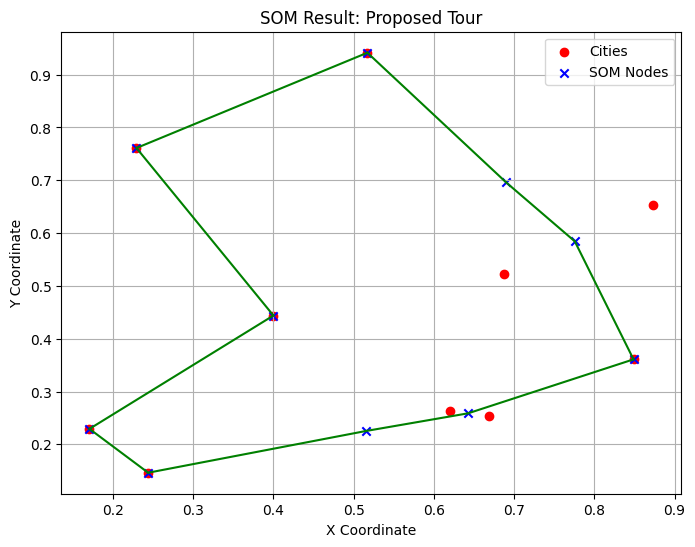

In [ ]:
#np.random.seed(0)
#np.random.seed(2)
#np.random.seed(5)
city_weights = np.random.rand(10, 2)

epochs = 200
sigma_0 = 2
sigma_T = 1e-3
learning_rate = 0.1
tau = compute_tau(sigma_0, sigma_T, epochs-1)

for epoch in range(epochs):
    sigma_t = sigma_0 * np.exp(-epoch**2/tau)
    # print(sigma_t)
    divisor = 2 * (sigma_t**2)
    for idx in range(num_cities):
        input_vec = cities[idx]
        distances = np.linalg.norm(city_weights - input_vec, axis=1)
        bmu = np.argmin(distances)

        d = np.abs(np.arange(num_cities) - bmu)
        d = np.minimum(d, num_cities - d)

        h_t = np.exp(-d**2/divisor).reshape(-1, 1)
        city_weights += learning_rate * h_t * (input_vec - city_weights)

plt.figure(figsize=(8, 6))
plt.scatter(cities[:, 0], cities[:, 1], c='red', label='Cities')
plt.scatter(city_weights[:, 0], city_weights[:, 1], c='blue', marker='x', label='SOM Nodes')

for i in range(num_cities):
    plt.plot([city_weights[i % num_cities, 0], city_weights[(i + 1) % num_cities, 0]],
             [city_weights[i % num_cities, 1], city_weights[(i + 1) % num_cities, 1]], 'g-')

plt.title('SOM Result: Proposed Tour')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend()
plt.grid()
plt.show()

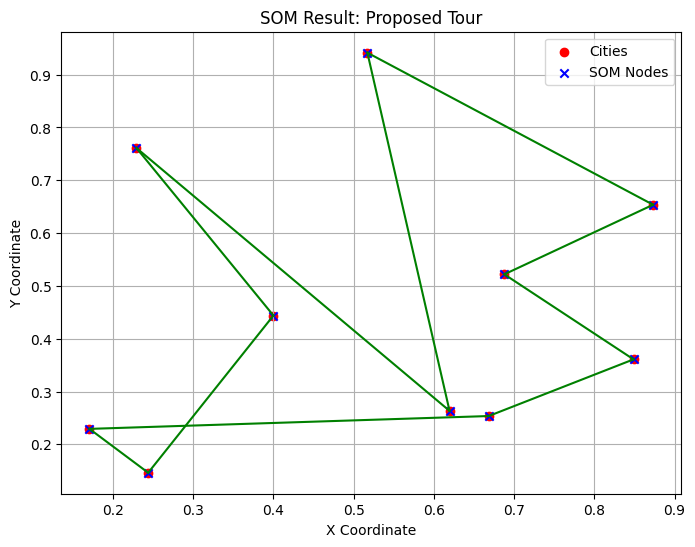

In [ ]:
#np.random.seed(0)
#np.random.seed(1)
city_weights = np.random.rand(10, 2)

epochs = 200
sigma_0 = 2
sigma_T = 1e-3
learning_rate = 0.1
tau = compute_tau(sigma_0, sigma_T, epochs-1)

for epoch in range(epochs):
    sigma_t = sigma_0 * np.exp(-epoch**2 / tau)
    divisor = 2 * (sigma_t**2)
    bmu_status = np.zeros(num_cities, dtype=bool)

    for idx in range(num_cities):
        input_vec = cities[idx]
        distances = np.linalg.norm(city_weights - input_vec, axis=1)
        not_bmu_indices = np.where(~bmu_status)[0]
        filtered_distances = distances[not_bmu_indices]

        bmu_index_within_candidates = np.argmin(filtered_distances)
        bmu = not_bmu_indices[bmu_index_within_candidates]
        bmu_status[bmu] = True

        d = np.abs(np.arange(num_cities) - bmu)
        d = np.minimum(d, num_cities - d)

        h_t = np.exp(-d**2 / divisor).reshape(-1, 1)
        city_weights += learning_rate * h_t * (input_vec - city_weights)

plt.figure(figsize=(8, 6))
plt.scatter(cities[:, 0], cities[:, 1], c='red', label='Cities')
plt.scatter(city_weights[:, 0], city_weights[:, 1], c='blue', marker='x', label='SOM Nodes')

for i in range(num_cities):
    plt.plot([city_weights[i % num_cities, 0], city_weights[(i + 1) % num_cities, 0]],
             [city_weights[i % num_cities, 1], city_weights[(i + 1) % num_cities, 1]], 'g-')

plt.title('SOM Result: Proposed Tour')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend()
plt.grid()
plt.show()

In [ ]:
votes = np.loadtxt('votes.dat', delimiter=',').reshape(-1, 31)

parties = np.loadtxt('mpparty.dat', dtype=int, skiprows=3)
party_code = {0:'no party', 1:'Moderate Party', 2:'Liberals', 3:'Social Democratic Party', 4:'Left Party', 5:'Green Party', 6:'Christian Democrats', 7:'Centre Party'}
party_color = {
    'Left Party': '#FF0000',    # 左翼党-红色
    'Social Democratic Party': '#E8112d',    # 社会民主党-深红
    'Green Party': '#83CF39',   # 环境党-绿色
    'Centre Party': '#009933',    # 中间党-深绿
    'Liberals': '#006AB3',   # 自由党-蓝色
    'Moderate Party': '#52BDEC',    # 温和党-浅蓝
    'Christian Democrats': '#000077',   # 基督教民主党-深蓝
    'no party': '#CCCCCC'  # 无党派-灰色
}

sexes = np.loadtxt('mpsex.dat', dtype=int, skiprows=2)
sex_code = {0:'male', 1:'female'}

districts = np.loadtxt('mpdistrict.dat', dtype=int)
# names = np.loadtxt('mpnames.txt', dtype=str)

In [ ]:
grid_size = 10
imput_dim = 31
epochs = 500
learning_rate = 0.1
sigma_0 = 32
sigma_T = 1
tau = compute_tau(sigma_0, sigma_T, epochs-1)

np.random.seed(42)
weights = np.random.rand(grid_size**2, votes.shape[-1])

for epoch in range(epochs):
    sigma_t = sigma_0 * np.exp(-epoch**2 / tau)
    divisor = 2 * (sigma_t**2)

    order = np.random.permutation(len(votes))

    for idx in order:
        input_vec = votes[idx]

        distances = np.linalg.norm(weights - input_vec, axis=1)

        bmu = np.unravel_index(np.argmin(distances), (grid_size,grid_size))

        x = np.arange(grid_size)
        y = np.arange(grid_size)
        xx, yy = np.meshgrid(x, y, indexing='ij')

        d = np.sqrt((xx - bmu[0])**2 + (yy - bmu[1])**2)

        h_t = np.exp(-d**2 / divisor).reshape(-1, 1)
        weights += learning_rate * h_t * (input_vec - weights)

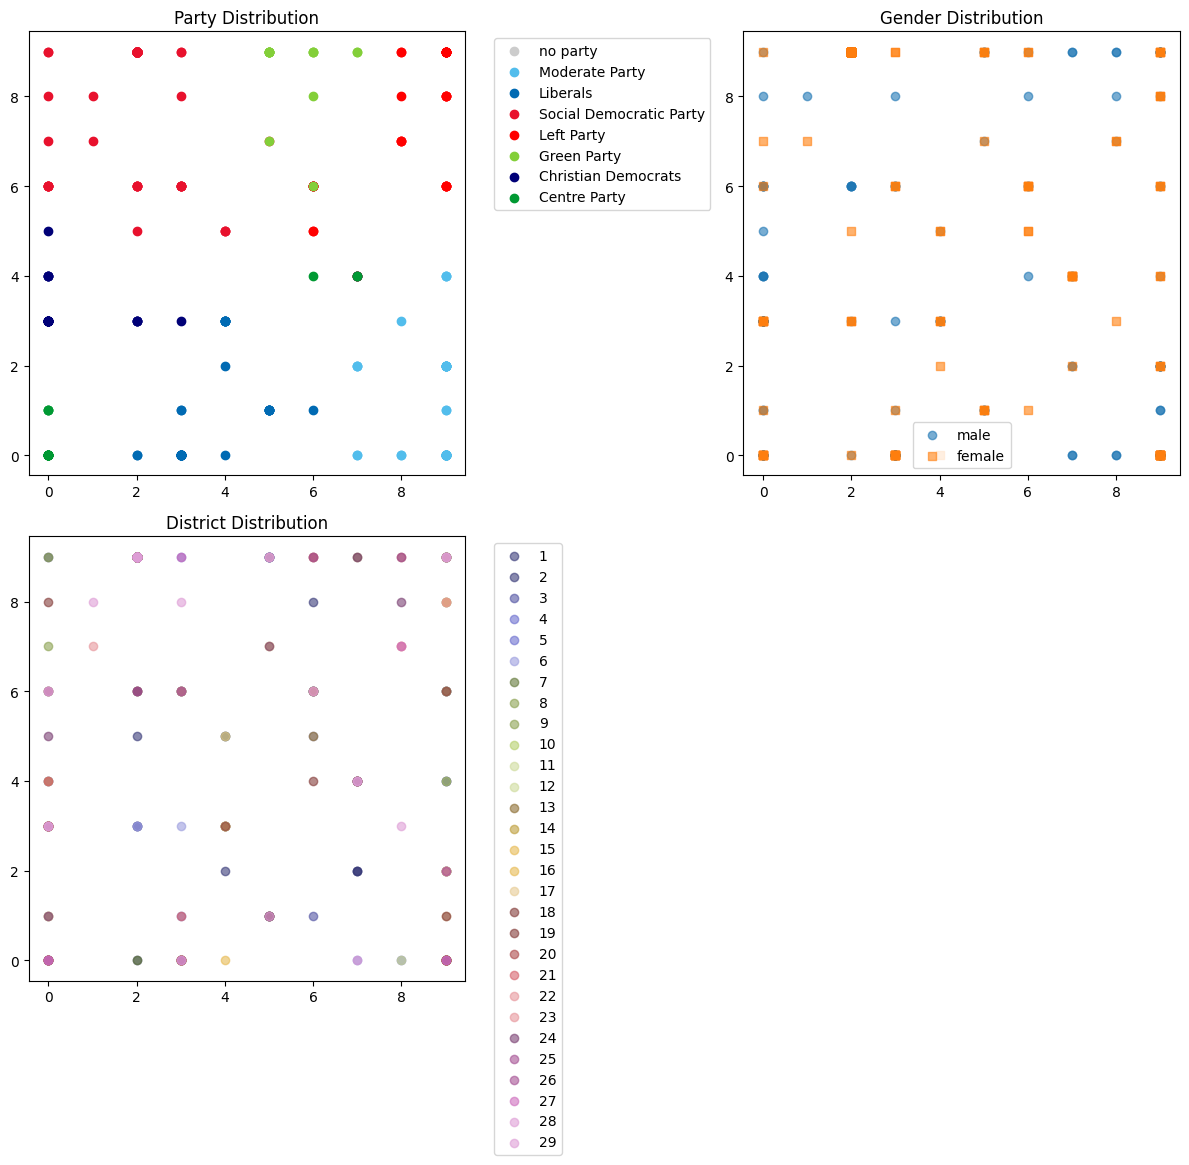

In [ ]:
positions = []
for mp in votes:
    distances = np.linalg.norm(weights - mp, axis=-1)
    positions.append(np.unravel_index(np.argmin(distances), (grid_size,grid_size)))

positions = np.array(positions)

plt.figure(figsize=(12, 12))

plt.subplot(2, 2, 1)
unique_parties = np.unique(parties)
for party in unique_parties:
    mask = parties == party
    plt.scatter(positions[mask, 0], positions[mask, 1], label=party_code[party], c=[party_color[party_code[party]]], alpha=1)
plt.title('Party Distribution')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.subplot(2, 2, 2)
for gender, marker in [(0, 'o'), (1, 's')]:
    mask = sexes == gender
    plt.scatter(positions[mask, 0], positions[mask, 1], marker=marker, label=sex_code[gender], alpha=0.6)
plt.title('Gender Distribution')
plt.legend()

plt.subplot(2, 2, 3)
unique_districts = np.unique(districts)
district_colors = plt.cm.tab20b(np.linspace(0, 1, len(unique_districts)))

for district, color in zip(unique_districts, district_colors):
    mask = districts == district
    plt.scatter(positions[mask, 0], positions[mask, 1], color=color, label=district, alpha=0.6)
plt.title('District Distribution')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()